In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot  as plt


In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Kaggle dataset
#https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification

#File Structure:
#dataset/
#    Training_set.csv
#    Testing_set.csv
#    train/
#    test/

# Load the training and testing datasets
train_df = pd.read_csv(r"./dataset/Training_set.csv")
test_df = pd.read_csv(r"./dataset/Testing_set.csv")

train_dir = "./dataset/train"
test_dir = "./dataset/test"
print(train_df)

            filename                     label
0        Image_1.jpg          SOUTHERN DOGFACE
1        Image_2.jpg                    ADONIS
2        Image_3.jpg            BROWN SIPROETA
3        Image_4.jpg                   MONARCH
4        Image_5.jpg  GREEN CELLED CATTLEHEART
...              ...                       ...
6494  Image_6495.jpg          MANGROVE SKIPPER
6495  Image_6496.jpg            MOURNING CLOAK
6496  Image_6497.jpg                   APPOLLO
6497  Image_6498.jpg           ELBOWED PIERROT
6498  Image_6499.jpg                     ATALA

[6499 rows x 2 columns]


In [15]:
import os

print("Train directory path:", train_dir)
print("First few files in train_dir:", os.listdir(train_dir)[:5])


Train directory path: ./dataset/train
First few files in train_dir: ['Image_1.jpg', 'Image_10.jpg', 'Image_100.jpg', 'Image_1000.jpg', 'Image_1001.jpg']


In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential


In [6]:
img_height = 128
img_width = 128
BATCH_SIZE = 32

In [16]:
# rescaling(normalization) and augmentation(if any)
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [17]:
# this allows us to take the respective df and match it to its filename, label
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = train_dir,
    x_col = 'filename',
    y_col = 'label',
    target_size = (img_height, img_width),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset="training"
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = train_dir,
    x_col = 'filename',
    y_col = 'label',
    target_size = (img_height, img_width),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset="validation"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    directory = test_dir,
    x_col = 'filename',
    y_col = None,
    target_size = (img_height, img_width),
    batch_size = BATCH_SIZE,
    class_mode = None,
    shuffle = False
)

num_classes = len(train_generator.class_indices)
print(num_classes)


Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.
Found 2786 validated image filenames.
75


In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

c:\Users\Rugved\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 75)             │        38,475 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,145,995 (19.63 MB)

 Trainable params: 5,145,995 (19.63 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model
EPOCHS = 15

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 30s 187ms/step - accuracy: 0.7318 - loss: 0.9030 - val_accuracy: 0.6352 - val_loss: 1.4009
Epoch 2/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8125 - loss: 0.5805 - val_accuracy: 0.6234 - val_loss: 1.4111
Epoch 3/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 30s 182ms/step - accuracy: 0.7980 - loss: 0.6605 - val_accuracy: 0.6164 - val_loss: 1.5487
Epoch 4/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7188 - loss: 0.6513 - val_accuracy: 0.6227 - val_loss: 1.5525
Epoch 5/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 31s 190ms/step - accuracy: 0.8369 - loss: 0.5202 - val_accuracy: 0.6289 - val_loss: 1.5461
Epoch 6/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9062 - loss: 0.4119 - val_accuracy: 0.6336 - val_loss: 1.5289
Epoch 7/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 31s 194ms/step - accuracy: 0.8831 - loss: 0.3780 - val_accuracy: 0.6336 - val_loss: 1.6516
Epoch 8/15
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8750 - loss: 0.2731 - 

In [27]:
# Make predictions on the test set
print("\nMaking predictions on test set...")
predictions = model.predict(test_generator)

# Get predicted class indices
predicted_class_indices = tf.argmax(predictions, axis=1)

# Get class labels from the training generator
class_labels = list(train_generator.class_indices.keys())
class_labels.sort()

# Map predicted indices to class names
predicted_class_names = [class_labels[idx] for idx in predicted_class_indices]

# Display some predictions (optional)
print("\nSample Predictions:")
for i in range(min(5, len(test_df))):
    print(f"Image: {test_df['filename'].iloc[i]}, Predicted Class: {predicted_class_names[i]}")


Making predictions on test set...
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step

Sample Predictions:
Image: Image_1.jpg, Predicted Class: PINE WHITE
Image: Image_2.jpg, Predicted Class: CRIMSON PATCH
Image: Image_3.jpg, Predicted Class: RED SPOTTED PURPLE
Image: Image_4.jpg, Predicted Class: RED POSTMAN
Image: Image_5.jpg, Predicted Class: MILBERTS TORTOISESHELL


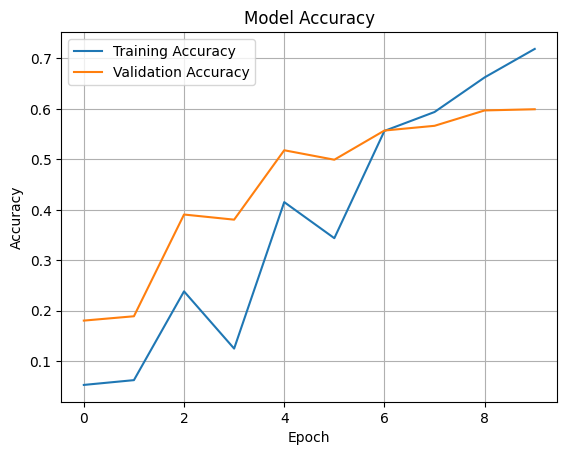

In [ ]:

# Accuracy with epochs 10
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


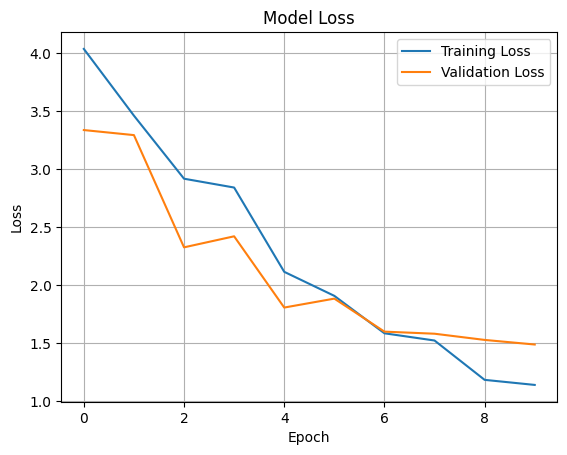

In [25]:
# Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

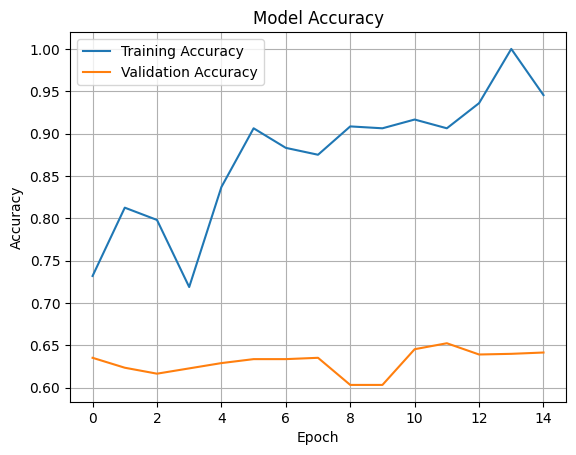

In [28]:
# Accuracy with epochs 15
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

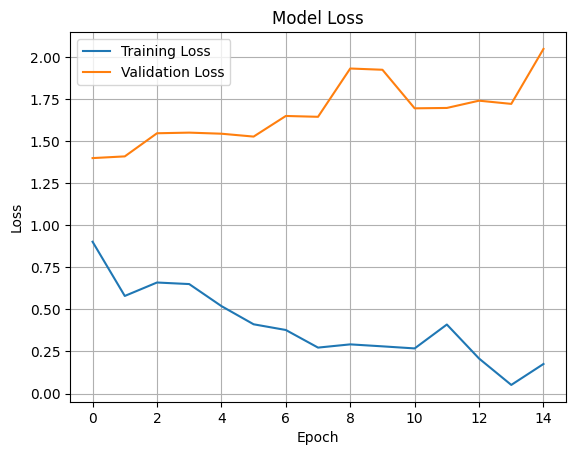

In [29]:
# Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()